In [ ]:
from platform import python_version
print(python_version())

In supervised machine learning, the dataset contains a target variable that we're trying to predict. As the name suggests, we can supervise our model's performance since it's possible to objectively verify if its outputs are correct.

When working with unsupervised algorithms, we have an unlabelled dataset, which means we do not have a target variable that we'll try to predict. In fact, the goal is not to predict anything, but to find patterns in the data.

Common unsupervised machine learning types:

-   Clustering: the process of segmenting the dataset into groups based on the patterns found in the data. Used to segment customers and products, for example.
-   Association: the goal is to find patterns between the variables, not the entries. It's frequently used for market basket analysis, for instance.
-   Anomaly detection: this kind of algorithm tries to identify when a particular data point is completely off the rest of the dataset pattern. Frequently used for fraud detection.



We'll focus on the use of unsupervised machine learning for clustering with the K-means algorithm. The K-means algorithm is an iterative algorithm designed to find a split for a dataset given a number of clusters set by the user. In other words, the K-means algorithm helps us split our population into a given number of groups. The number of clusters is called K.



As an iterative algorithm, K-means is based on repeating the same process over and over again for a determined number of times or until it reaches a determined stopping condition. For K-means, the algorithm randomly chooses K points to be the centers of the clusters. These points are called the clusters' centroids. K is set by the user. Then, an iterative process begins where each iteration is made of the following steps:

-   Calculate the euclidean distance between each data point to each centroid.
-   Assign each data point as belonging to the cluster of the closest centroid.
-   Calculate new centroids using the mean of the datapoints in each cluster.

The algorithm will then run until a maximum number of iterations is reached or until the centroids no longer change.



One of the most important metrics for evaluating a means algorithm is **inertia**. Inertia reflects how far the data points assigned to a cluster are from that cluster's centroid. Mathematically, inertia is the sum of the squared Euclidean distances from each of nn data points to a centroid, as given by the following formula:



Inertia and the number of clusters are inversely proportional, which means that the lower the number of clusters, the higher the inertia.

For instance, consider a dataset with one hundred observations and imagine that we split it into one hundred clusters. This means that each observation is its own cluster. Therefore, the distance from each data point to its cluster centroid is zero, and the inertia is also zero. But if each one is a centroid, then none of them is a centroid, and we have no split at all.

On the other hand, if we split these one hundred observations into 10 clusters, the inertia will be greater than the zero we had when using one hundred clusters. However, it makes more sense to split a one hundred-row dataset into ten clusters than into one hundred, even though the inertia is higher.

The goal is to find the sweet spot in the inertia-clusters trade-off. We need to find the lower number of clusters that produces the lowest inertia and still makes sense to split the data with.



Keeping in mind that the ideal model has few clusters and low inertia, we can see the number of clusters as the cost of lowering inertia.

In order to increase our cost by increasing the number of clusters by one, we must have a gain in inertia or, in other words, a better model. We should stop adding clusters when the gain in inertia increases at lower and lower rates. In economics, this is called [diminishing returns](https://en.wikipedia.org/wiki/Diminishing_returns).

That's when the Elbow Curve comes in. The Elbow Curve is nothing more than a line plot of the inertias against the number of clusters. Since the values on the y-axis are decreasing while the values on the x-axis are increasing



For this particular use case, we call it the elbow curve because we assume that the first clusters will cause the inertia to decrease very fast, and, at some point, this decrease will become slower in such a way that we'll see a sharp "elbow" on the curve:

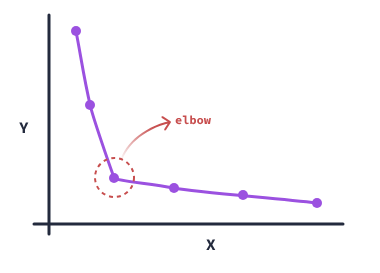

This sharp "elbow" is where we should set our number of clusters.

The bottom line is that the Elbow Curve allows us to visually understand how the number of clusters affects the quality of the model. As we said, a single value for inertia does not say anything, but a visual representation of many inertias put together makes it a lot easier to set the number of clusters for our model.

In another example, let's say we're not segmenting customers, but stores in a big chain of supermarkets in our city. The company has built five distribution centers, strategically located around the city, and, although a distribution center can service up to two clusters, they all need to have at least one cluster assigned to them. This means we would need a minimum of five clusters and by looking at the curve, we would definitely choose five.

Always be aware of input from business teams when making decisions about the ideal number of clusters for your problem.



The ideal number of clusters is where inertia begins to decrease at lower rates.

scikit-learn's K-means has a few noteworthy features. First of all, it's very efficient — it takes advantage of much faster data structures than a Pandas DataFrame, for example.

The most important aspects of scikit-learn's implementations are the following:

-   It's not restricted to two-column datasets.
    
-   It has the n\_init parameter. This parameter represents the number of times the entire algorithm will initialize once you run it. As the first centroids are randomly initialized, there's always a chance they won't converge to the clusters with lower possible inertia. That's why scikit-learn uses this parameter to run the algorithm multiple times and then selects the one that generated the lowest inertia. The default value for n\_init is 10.
    
-   Using K-means with scikit-learn is also very intuitive. As with every algorithm in the library, we have to import the KMeans class from sklearn.cluster and instantiate an object. We can use the n\_clusters parameter to set the number of clusters. However, if we choose not to, the default is n\_clusters=8.



K-means doesn't need to be trained as a classification, regression, or recommendation algorithm; therefore, we don't need to use the fit and then predict methods. Instead, we can directly call the fit\_predict method, which does all the work and returns an array with the cluster for each data point.





After we fit\_predict the model, we can access several attributes from the model object:

-   model.inertia\_: the inertia resulting from the clusters split.
-   model.cluster\_centers\_: the coordinates of the final centroids.
-   model.n\_iter\_: the number of iterations necessary to converge into the resulting clusters.
-   model.n\_features\_in\_: the number of features passed to the model.
-   model.feature\_names\_in\_: the name of the features passed to the model.



Most machine learning algorithms perform better when they use variables that are scaled to a certain range, and K-means is one of them.

The core of the K-means algorithm is the computation of distances between points, either for assigning clusters, calculating centroids, or calculating the inertia generated by the split. Therefore, if the variables in the dataset are of incomparable magnitudes, this could be an issue.



Let's say we have a variable that's measured in kilograms and another measured in millimeters. If the data is about human beings, for instance, the values for weight will probably be around dozens of kilograms while the height will be in the thousands. This means the axis in a scatterplot won't be in the same proportion, and points that are more distant in the height axis will be highly penalized.

For this, scikit-learn has the StandardScaler class that performs the standardization of the data.

The standardization is done by calculating the z-score for each observation in a column. This is the z-score formula:

You probably had a hard time deciding the best number of clusters from the Elbow Curve you plotted. There wasn't a clear, sharp elbow in the curve.

Unfortunately, that happens more than we'd like when segmenting data. If we check the percentage loss of inertia, we'll notice that decrease is much slower than the one we saw:


Here are some possible solutions:

-   Gather more data.
    
-   Look for new features.
    
-   Look for business rules or insights that might lead to a decision for one cluster over another.
    
-   Try different numbers of clusters, and see how the split goes in each of them.
    

# Credit Card Customer

In [4]:
import pandas as pd

In [5]:
customer = pd.read_csv("customer_segmentation.csv")

In [6]:
customer.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [9]:
customer.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [11]:
customer.dtypes.value_counts()

int64      9
object     3
float64    2
Name: count, dtype: int64

In [12]:
customer.describe(include = "object")

,gender,education_level,marital_status
count,10127,10127,10127
unique,2,6,4
top,F,Graduate,Married
freq,5358,3685,4687


In [14]:
cat = customer.describe(include = "object").columns.tolist()

In [16]:
for c in cat:
    print(customer[c].value_counts())
    print("-"*20)

gender
F    5358
M    4769
Name: count, dtype: int64
--------------------
education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64
--------------------
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------------------


In [34]:
correlations = customer.select_dtypes("number").drop("customer_id", axis = 1).corr()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

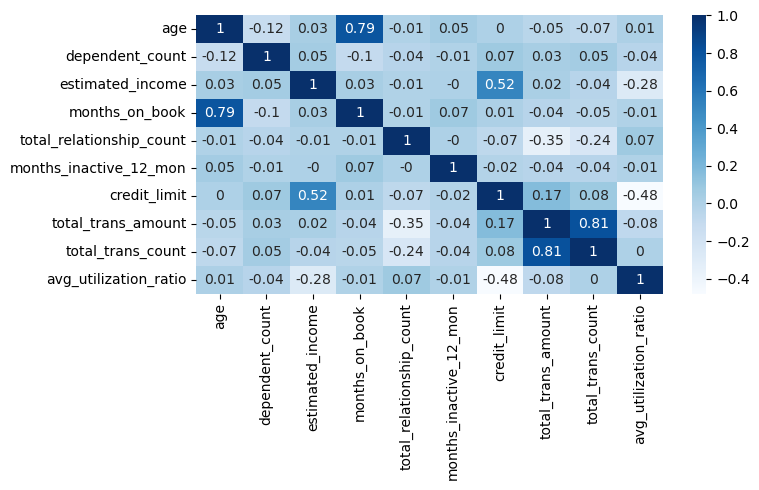

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(round(correlations,2), annot=True, cmap="Blues")
plt.tight_layout()
plt.show()

In [50]:
customers_modif = customer.copy()

In [51]:
customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}, inplace=True)
customers_modif['education_level'].head()

C:\Users\CGDC\AppData\Local\Temp\ipykernel_16804\395384402.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,


0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

In [53]:
customers_modif = pd.get_dummies(customers_modif, drop_first=True)

In [57]:
customers_modif.shape

(10127, 16)

In [58]:
X = customers_modif.drop('customer_id', axis=1)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_scaled = scaler.fit_transform(X)

In [65]:
X_scaled.shape

(10127, 15)

In [66]:
from sklearn.cluster import KMeans

In [67]:
X = pd.DataFrame(X_scaled)

In [69]:
inertias = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

In [70]:
inertias

[151905.00000000003,
 134790.5953774078,
 123786.00405914593,
 116869.63367667231,
 104080.1239773314,
 98724.76566023039,
 95322.38815773111,
 92032.77905729541,
 88386.77498495803,
 87146.66942462881]

In [76]:
sns.set_style("dark")

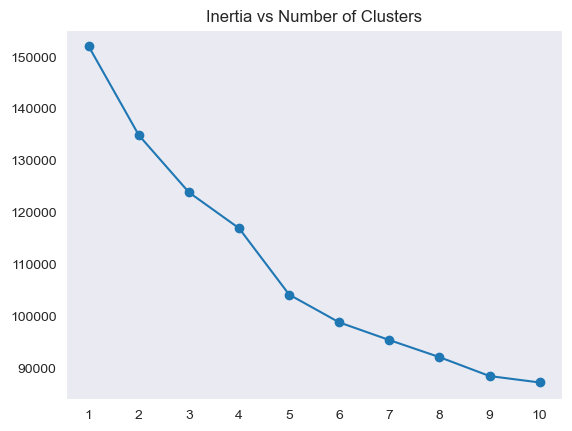

In [79]:
plt.plot(range(1,11), inertias, marker = "o")
plt.xticks(range(1,11), labels=range(1,11))
plt.title('Inertia vs Number of Clusters')
plt.show()

In [80]:
model = KMeans(n_clusters=6)
y = model.fit_predict(X_scaled)

y

array([1, 0, 1, ..., 4, 1, 4])

In [81]:
customer['CLUSTER'] = y + 1
customer

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,2
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,6
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,1
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,5
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,2


In [83]:
customer['CLUSTER'].value_counts().sort_values(ascending=False)

CLUSTER
5    2420
1    2358
2    1774
3    1350
4    1303
6     922
Name: count, dtype: int64

In [86]:
import numpy as np

In [87]:
numeric_columns = customer.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

In [88]:
numeric_columns

Index(['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

In [90]:
customer.groupby('CLUSTER')["age"].mean()

CLUSTER
1    43.249788
2    44.458286
3    57.811111
4    46.976976
5    44.320248
6    45.314534
Name: age, dtype: float64

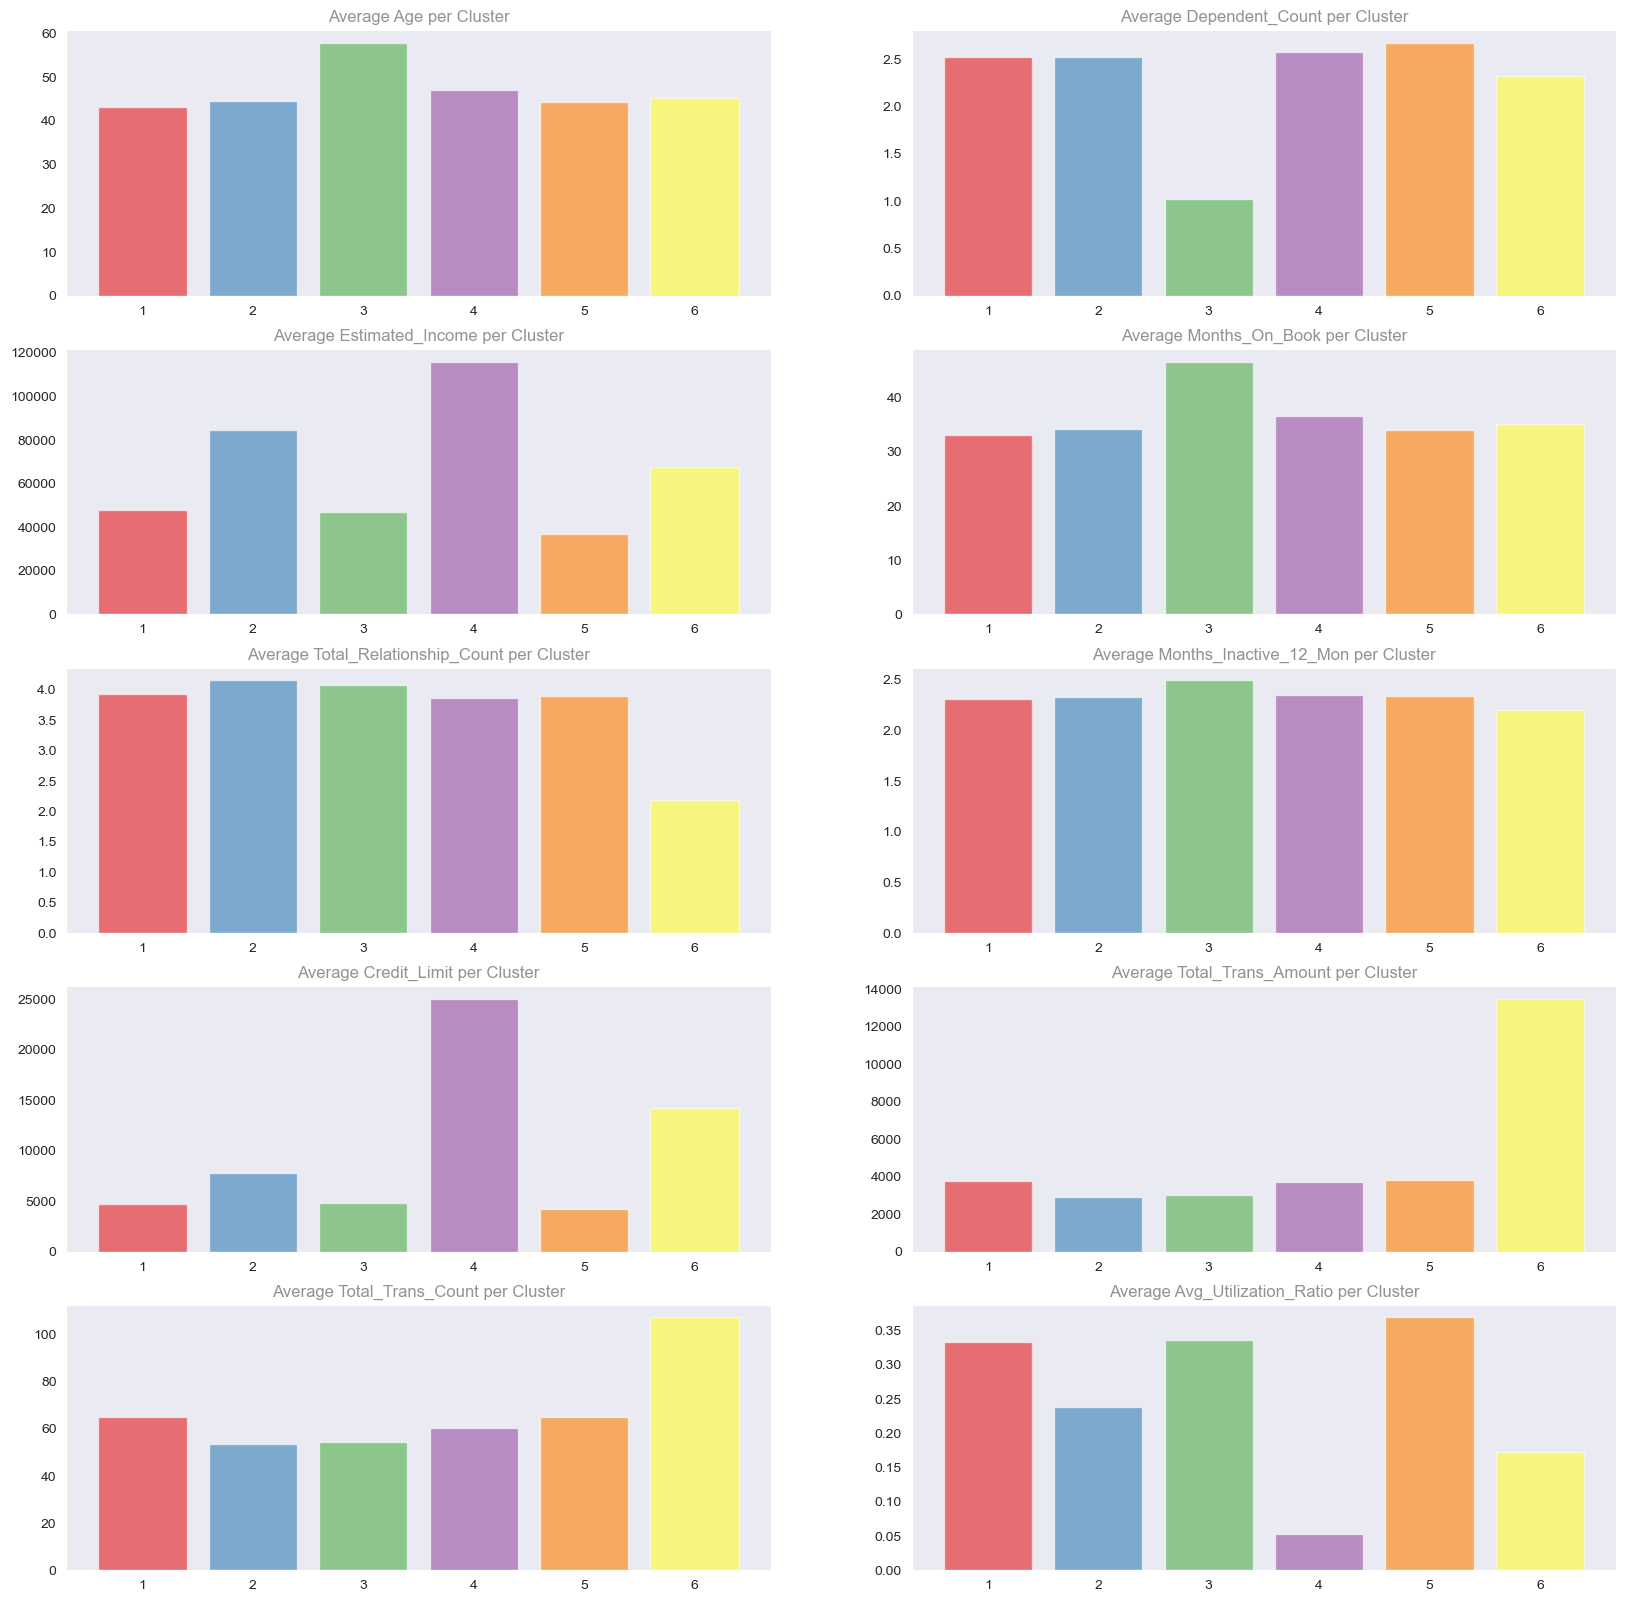

In [102]:
fig = plt.figure(figsize=(20,20))

for i, c in enumerate(numeric_columns):
    df_plot = customer.groupby("CLUSTER")[c].mean()
    ax = plt.subplot(5,2,i+1)
    ax.bar(df_plot.index, df_plot, alpha = 0.6, color = sns.color_palette("Set1"))
    ax.xaxis.grid(False)
    ax.set_title(f'Average {c.title()} per Cluster', alpha=0.5)

plt.show()

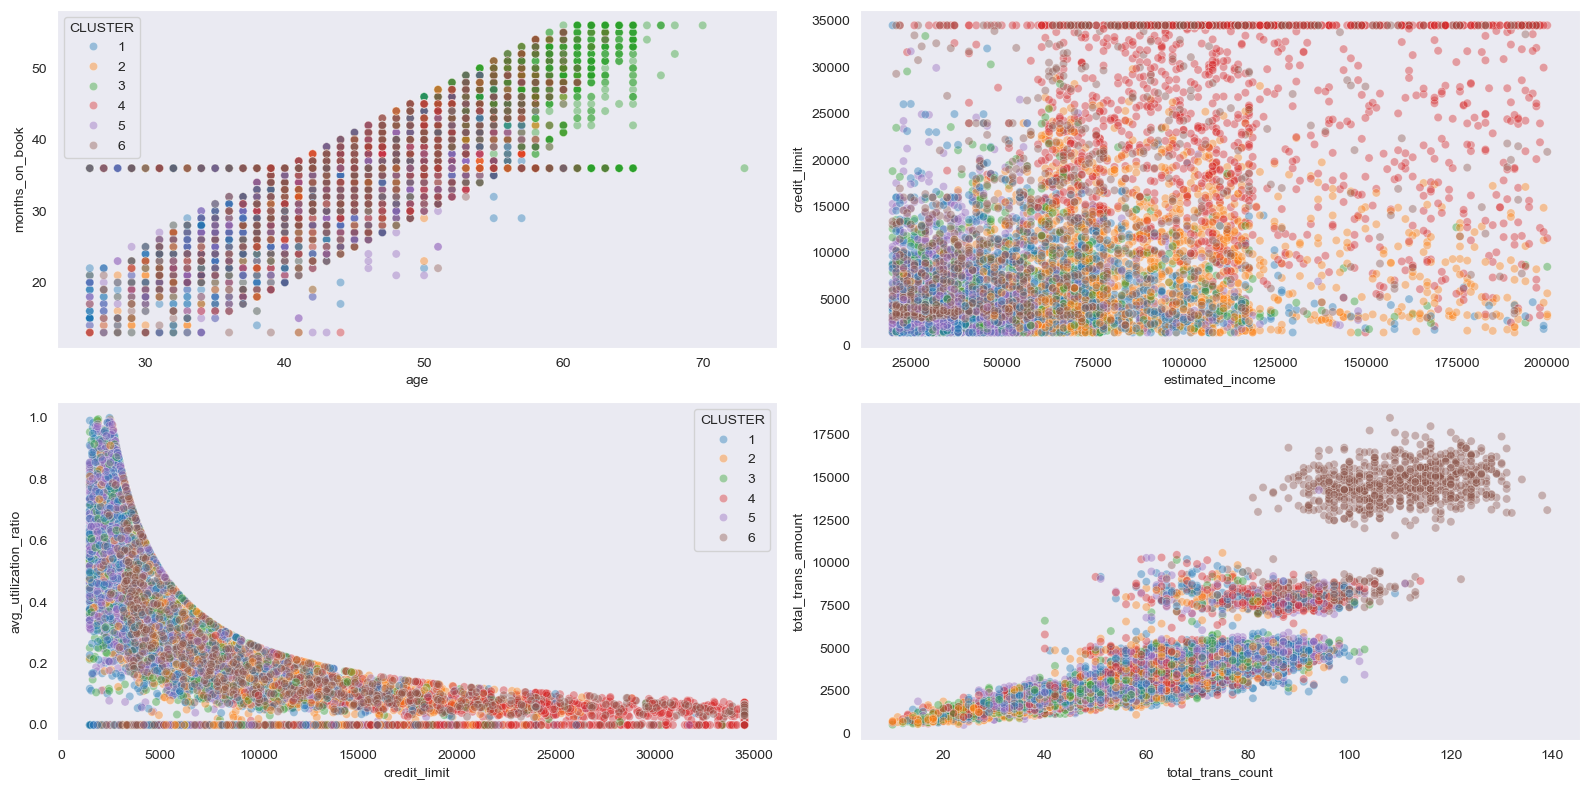

In [103]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customer, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

C:\Users\CGDC\AppData\Local\Temp\ipykernel_16804\1026466811.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\CGDC\AppData\Local\Temp\ipykernel_16804\1026466811.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\CGDC\AppData\Local\Temp\ipykernel_16804\1026466811.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


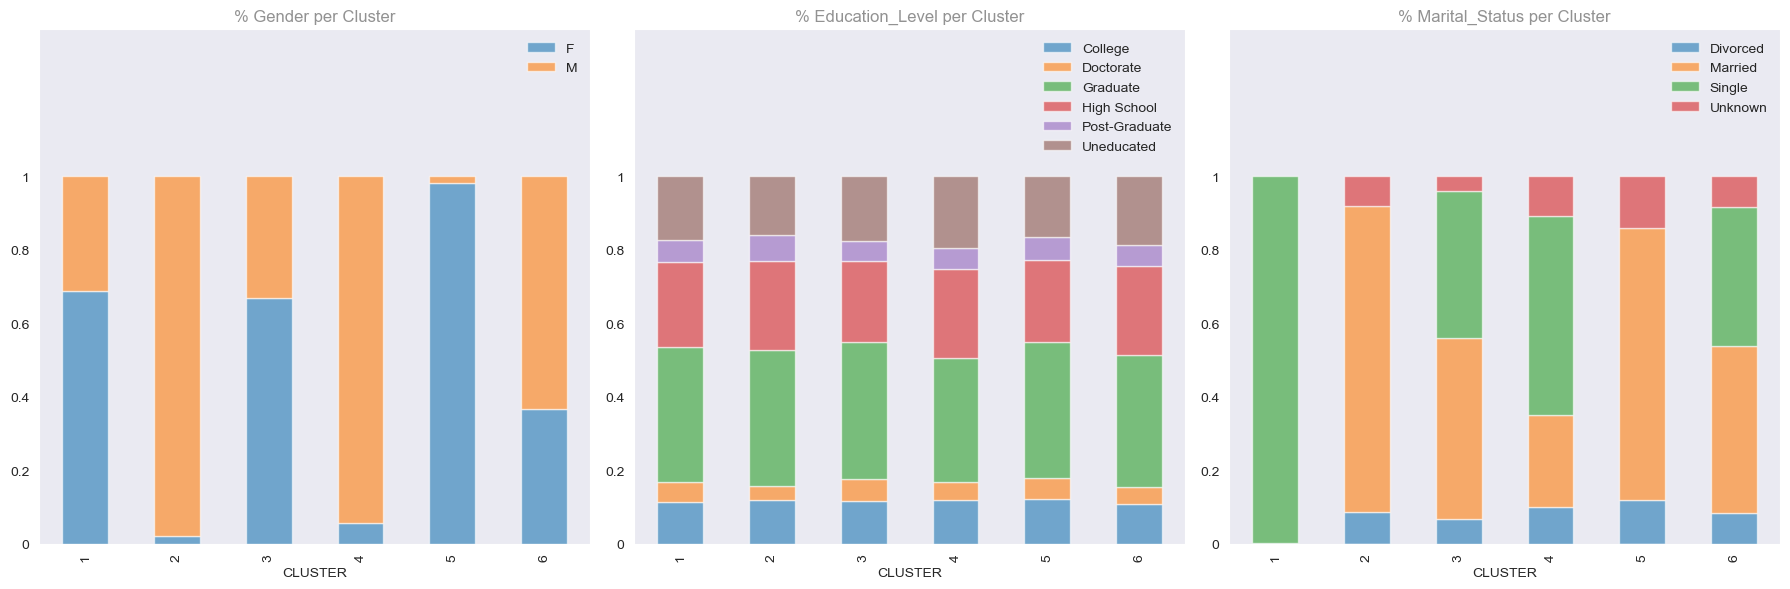

In [107]:
cat_columns = customer.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customer['CLUSTER'], columns=customer[col], values=customer[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()